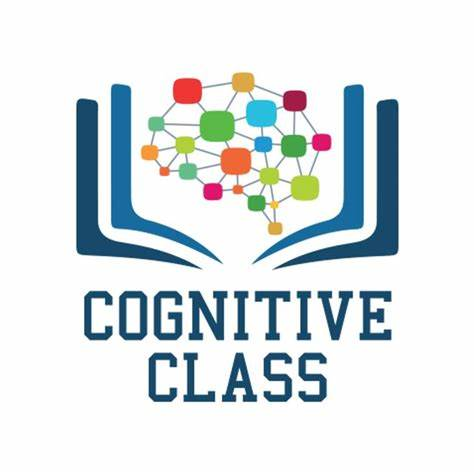

#Assignment: SQL Notebook for Peer Assignment

Estimated time needed: 60 minutes.

#Introduction

Using this Python notebook you will:

1. Understand the Spacex DataSet
2. Load the dataset into the corresponding table in a Db2 database
3. Execute SQL queries to answer assignment questions

#Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones.

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage.

Therefore if we can determine if the first stage will land, we can determine the cost of a launch.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.

#Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

Spacex DataSet



#Store the dataset in database table

it is highly recommended to manually load the table using the database console LOAD tool in DB2.

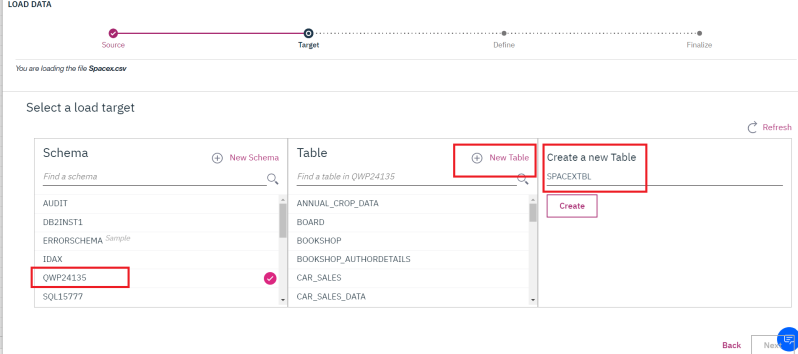

Now open the Db2 console, open the LOAD tool, Select / Drag the .CSV file for the dataset, Next create a New Table, and then follow the steps on-screen instructions to load the data. Name the new table as follows:



**SPACEXDATASET**

**Follow these steps while using old DB2 UI which is having Open Console Screen**


**Note:While loading Spacex dataset, ensure that detect datatypes is disabled. Later click on the pencil icon(edit option).**

1.Change the Date Format by manually typing DD-MM-YYYY and timestamp format as DD-MM-YYYY HH:MM:SS

2.Change the PAYLOAD_MASS__KG_ datatype to INTEGER.

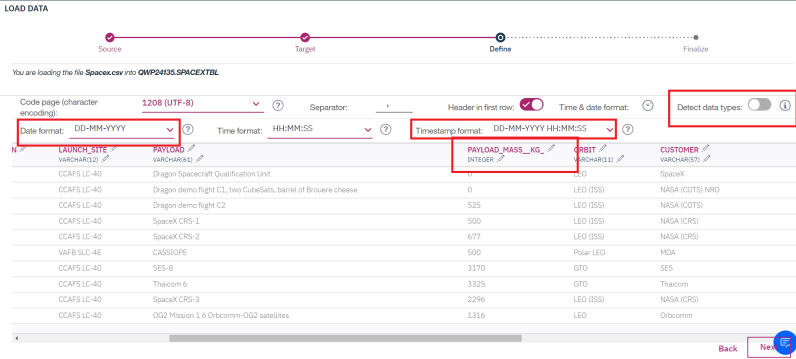

**Changes to be considered when having DB2 instance with the new UI having Go to UI screen**

* Refer to this insruction in this link for viewing the new Go to UI screen.

* Later click on Data link(below SQL) in the Go to UI screen and click on Load Data tab.

* Later browse for the downloaded spacex file.

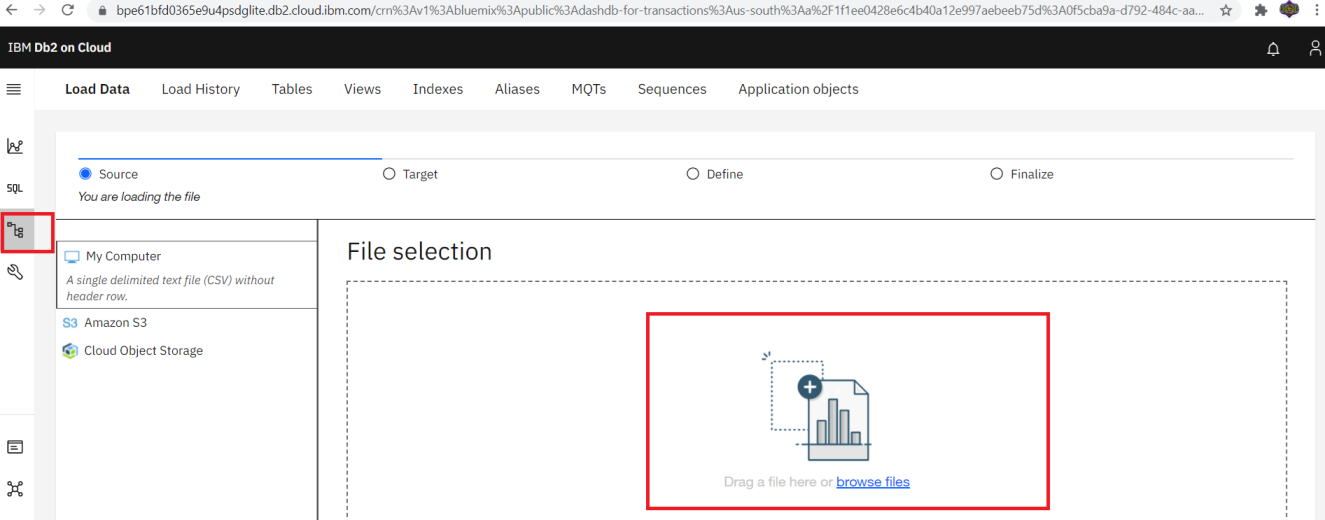

Once done select the schema andload the file

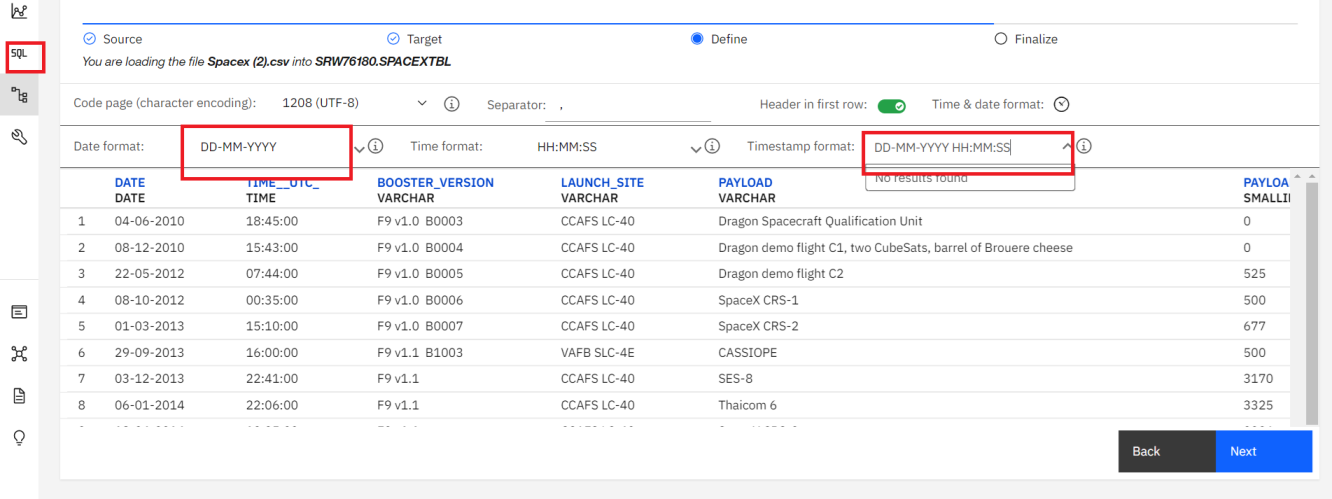




For this exercise, it was difficult to access IBM's Db2 due to high demand. To complete this exercise, we would make use of the postgre SQL.



In [ ]:
# install for connection to postgres database (local)
!pip install psycopg2

import csv
import psycopg2
import pandas as pd

# install for connection to the database using DB2 (cloud)
#!pip install sqlalchemy==1.3.9
#!pip install ibm_db_sa
#!pip install ipython-sql
print('Project libraries has been successfully installed!')

Project libraries has been successfully installed!


#Connect to the database using DB2

Let us first load the SQL extension and establish a connection with the database




In [ ]:
%load_ext sql


#DB2 magic in case of old UI service credentials.


In the next cell enter your db2 connection string. Recall you created Service Credentials for your Db2 instance before. From the uri field of your Db2 service credentials copy everything after db2:// (except the double quote at the end) and paste it in the cell below after ibm_db_sa://

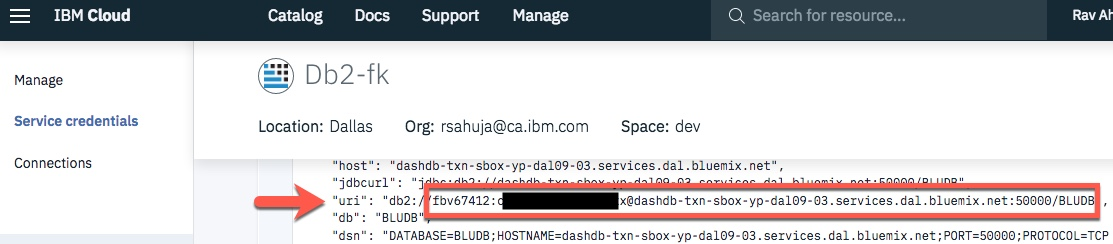

in the following format

**%sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name**

**DB2 magic in case of new UI service credentials**


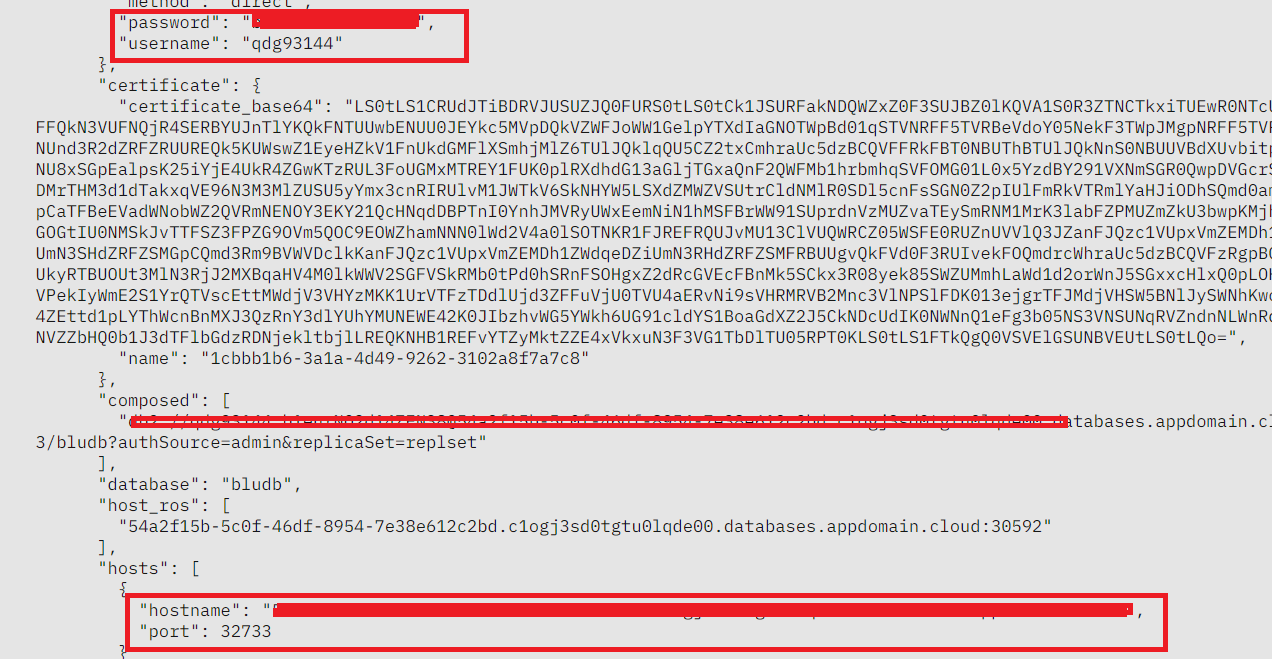



* Use the following format.
* Add security=SSL at the end

**%sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name?security=SSL**

In [12]:
# #jdbc:db2://fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/bludb:user=<user name>;password=<your_password>;sslConnection=true;


In [13]:
# # %sql ibm_db_sa://npj88637:U2doAY3Ir4HXvGQh@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/admin?security=SSL


#Tasks
Now write and execute SQL queries to solve the assignment tasks.

#Task 1

Display the names of the unique launch sites in the space mission

In [ ]:
!sql SELECT DISTINCT LAUNCH_SITE FROM SPACEXTBL ORDER BY 1;

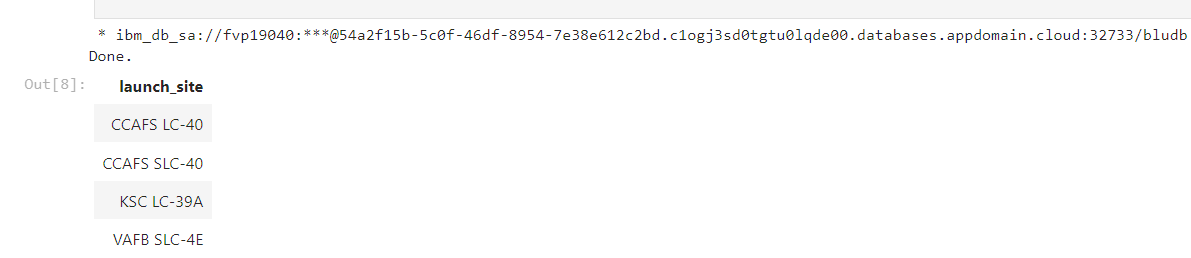

#Task 2

Display 5 records where launch sites begin with the string 'CCA'



In [9]:
sql ="SELECT * FROM SPACEXTBL WHERE LAUNCH_SITE LIKE 'CCA%' LIMIT 5;"

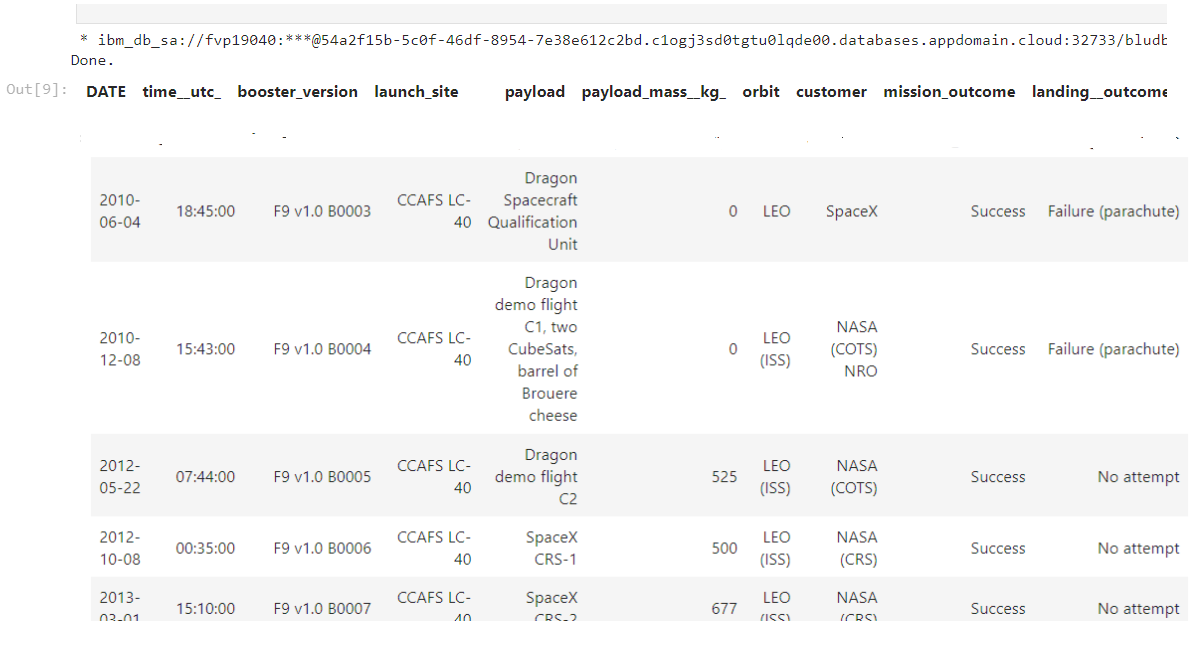

#Task 3

Display the total payload mass carried by boosters launched by NASA (CRS)


In [ ]:
!sql SELECT SUM(PAYLOAD_MASS__KG_) AS TOTAL_PAYLOAD FROM SPACEXTBL WHERE PAYLOAD  LIKE '%CRS%';

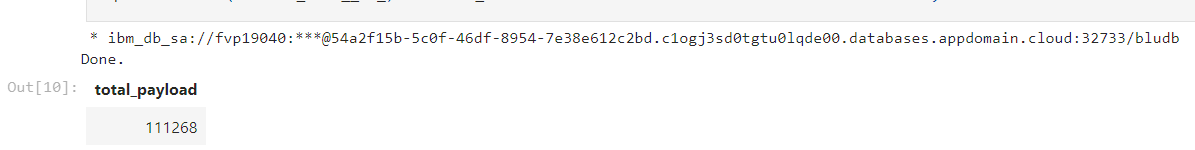

#Task 4

Display average payload mass carried by booster version F9 v1.1



In [ ]:
!sql SELECT AVG(PAYLOAD_MASS__KG_) AS AVG_PAYLOAD FROM SPACEXTBL WHERE BOOSTER_VERSION = 'F9 v1.1';

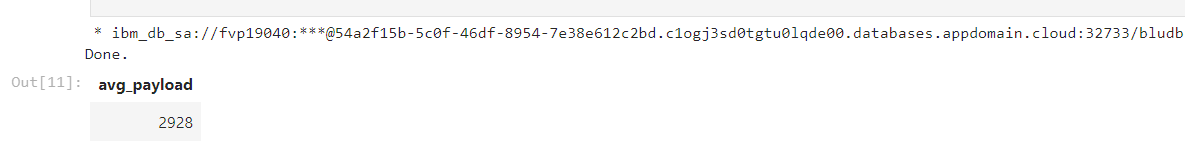

#Task 5

#List the date when the first successful landing outcome in ground pad was acheived.

Hint:Use min function




In [18]:
sql ="SELECT MIN(DATE) AS FIRST_SUCCESS_GP FROM SPACEXTBL WHERE LANDING__OUTCOME = 'Success (ground pad)'";

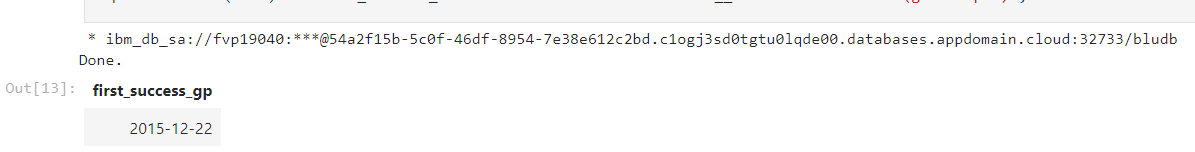

#Task 6

**List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000**



In [ ]:
!sql = SELECT  DISTINCT BOOSTER_VERSION FROM SPACEXTBL WHERE PAYLOAD_MASS__KG_ BETWEEN 4000 AND 6000 AND LANDING__OUTCOME = 'Success (drone ship)';

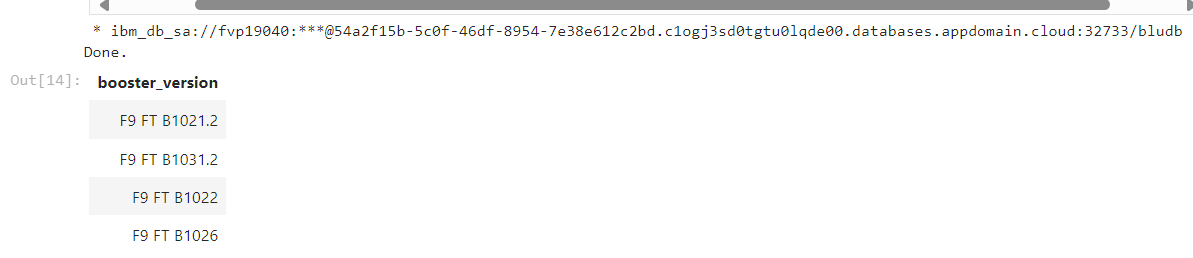

#Task 7

**List the total number of successful and failure mission outcomes**


In [ ]:
!sql SELECT MISSION_OUTCOME, COUNT(*) AS QTY FROM SPACEXTBL GROUP BY MISSION_OUTCOME ORDER BY MISSION_OUTCOME;

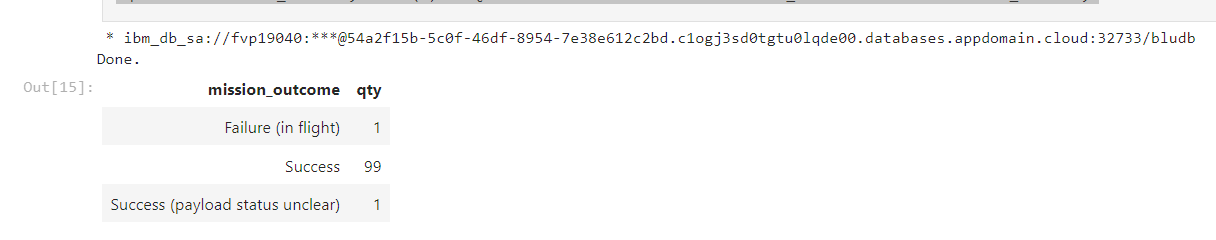

#Task 8

**List the names of the booster_versions which have carried the maximum payload mass. Use a subquery**

In [ ]:
!sql  SELECT DISTINCT BOOSTER_VERSION FROM SPACEXTBL WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTBL) ORDER BY BOOSTER_VERSION;

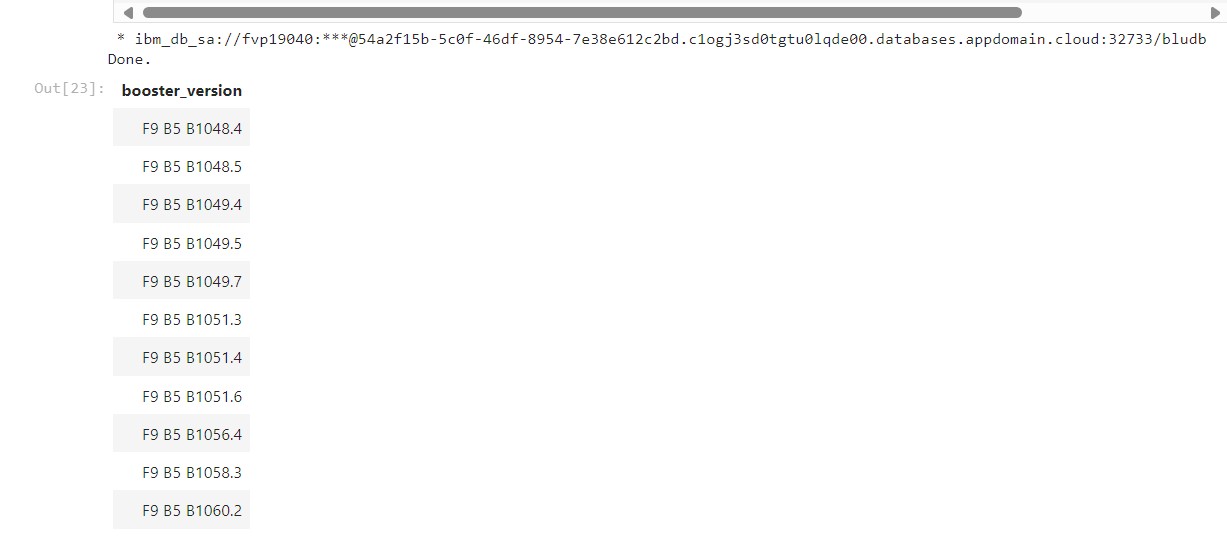

#Task 9

**List the failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015**


In [ ]:
!sql =SELECT BOOSTER_VERSION, LAUNCH_SITE FROM SPACEXTBL WHERE LANDING_OUTCOME = 'Failure (drone ship)' AND DATE_PART('YEAR', DATE) = 2015;

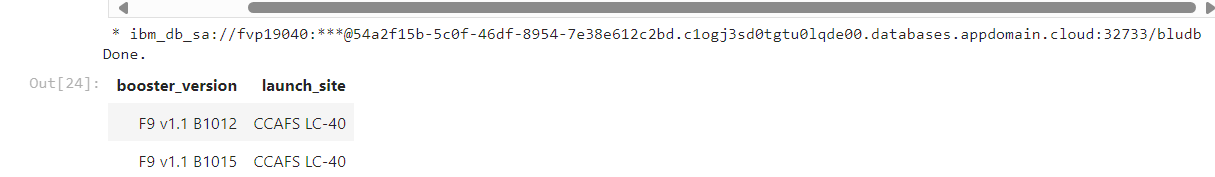

#Task 10

**Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order**

In [ ]:
!sql SELECT LANDING__OUTCOME, COUNT(*) AS QTY FROM SPACEXTBL WHERE DATE BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY LANDING__OUTCOME ORDER BY QTY DESC;


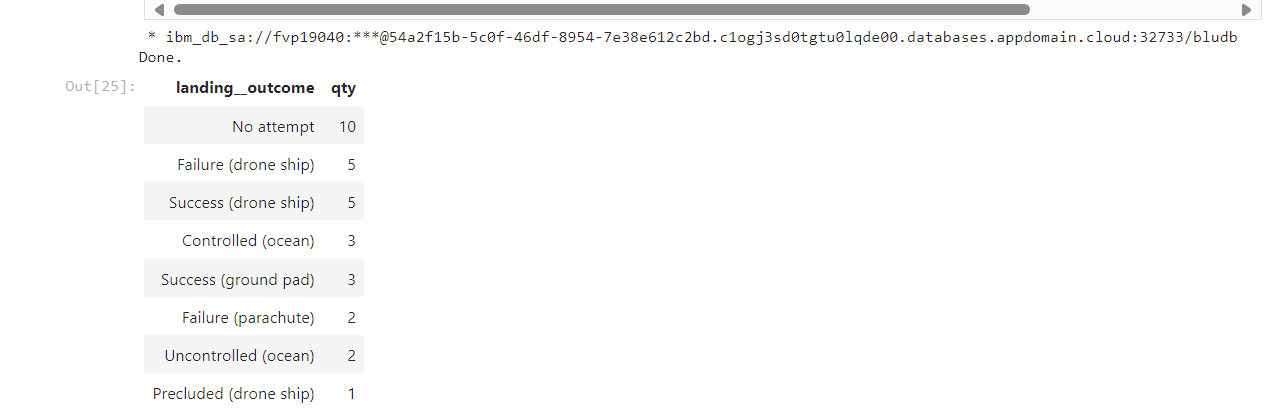

#Reference Links




*   Hands-on Lab : String Patterns, Sorting and Grouping
*   Hands-on Lab: Built-in functions
*   Hands-on Lab : Sub-queries and Nested SELECT Statements
*   Hands-on Tutorial: Accessing Databases with SQL magic
*   Hands-on Lab: Analyzing a real World Data Set



#Author(s)

Lakshmi Holla




#Other Contributors

Rav Ahuja



#Change log


Date	Version	Changed by	Change Description
2021-08-24	0.3	Lakshmi Holla	Added library update
2021-07-09	0.2	Lakshmi Holla	Changes made in magic sql
2021-05-20	0.1	Lakshmi Holla	Created Initial Version

© IBM Corporation 2021. All rights reserved.